![example](images/director_shot.jpeg)

# Recommendations for Microsoft’s New Original Studio
## - Analysis of the most profitable movies


**Authors:** Colin Pelzer, Daniel Burdeno, Emiko Naomasa, Piotr Czolpik
***

## 1. Overview

In this project, we analyzed box office films released in the past ten years, 2010-2021, and found a pattern in high profit movies. Our findings were transformed to actionable recommendations for the Microsoft Studio team to support the launch of a new original movie studio. Our analysis revealed which  movie genres provide a higher return, how the season affects tickets sales, and which directors have had the most overall success in the market. 


## 2. Business Problem

Microsoft has expressed its interest in entering the film production industry and have decided to create a new movie studio to produce original movies. To support the head of Microsoft studio’s decisions on what types of films to create, we explored what types of films at the box office can produce a high rate of return and translate into actionable intel. In this analysis, we especially focused on the following business questions relating to genres, directors, and the seasonality of the movie industry.

1.	Which genre of movies will promise a high rate of return on investment?   
2.	Are there any seasonal changes in box tickets sales? If so, which months of the year are the best times to release movies? 
3.  Among movie directors in the horror genre, who will be the best option to produce a movie? 
	

## 3. Data Understanding

Datasets were scraped from IMDb.com and The-Numbers.com, data from IMDb contains data regarding movie runtime, genre, and directors. The-Numbers dataset contains information relating to worldwide gross and production budget, which allowed us to calculate profit and return on investment (ROI). The dataset also included release dates, which allowed us to calculate the importance of season. We cleaned datasets to only contain information related the last ten years, to insure our reccomendations reflect the current market. Information from both datasets were joined to compare variables against total profit and ROI in order to produce meaningful recommendations.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

In [2]:
df_crew = pd.read_csv('Data/zippedData/imdb.title.crew.csv.gz')
df_name = pd.read_csv('Data/zippedData/imdb.name.basics.csv.gz')
df_title_basic = pd.read_csv('Data/zippedData/imdb.title.basics.csv.gz')
df_num = pd.read_csv('Data/zippedData/tn.movie_budgets.csv.gz')

In [3]:
df_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [4]:
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [5]:
df_title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Film Crew Information

This dataset contains the unique id number for the crew involved with making the corresponding movies, we used this dataset to obtain the names of film directors.

In [7]:
df_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [8]:
df_crew['directors'].value_counts()

nm3266654              62
nm2682776              48
nm5592581              48
nm3583561              46
nm0183659              44
                       ..
nm9412848               1
nm4406142               1
nm9421434,nm9264299     1
nm0945902               1
nm0497834               1
Name: directors, Length: 98525, dtype: int64

Based on the intial look at the data, directors are seperated by a unique id name that we can cross reference with another database to pull their names, and the movies they worked on. We want to pull only movies with a single director, as they represent a majority of the data.

### Director Name Information

Using the information in this dataset, we can extract the name of the director from their unique id associated with them. We can now tie director name to the corresponding movie title's using both the previous and the next dataset (using tconst).

In [9]:
df_name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


### Title Basics

This is one of the main datasets that we are going to use to create suggestions, useful information like title, genre, and runtime are all available to us within

In [10]:
df_title_basic.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
df_title_basic['start_year'].value_counts()
# Most of the information is from the past 10 years, however there are some funky data points so we will still hard code a limit into the data.

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [12]:
df_title_basic['genres'].value_counts()
#Need to deal with multi-genre movies, and to trim down to the most relevant genres

Documentary                 32185
Drama                       21486
Comedy                       9177
Horror                       4372
Comedy,Drama                 3519
                            ...  
Adventure,Music,Mystery         1
Family,Horror,Romance           1
Biography,Family,Fantasy        1
Action,Animation,War            1
Fantasy,History,War             1
Name: genres, Length: 1085, dtype: int64

 Using the 'tconst' column, we can tie in the other supplementary datasets to include in our analysis. We can start to form questions off of this dataset such as, 'How does runtime affect the rating/ROI' or 'do certain genres dominate the market more than others?'

### The Numbers File

Three of the most important datapoints come from this set, production budget, worldwide gross, and release date. Utlizing production budget and worldwide gross we can compute both net profit and return on investment (ROI). This dataset will be on main set that we merge others into. We will need to trim it down to only contain movies from 2010 and onwards (last 10 years).

In [13]:
df_num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
df_num.info()
#All the number data are objects, we will need to convert them to int/float to provide more analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Its a common idea that movies that come out during the summer and beginning of the holiday season perform better, using this data we can figure out how much it truly affects the total profitability.

## 4. Data Preparation

Initial data preparation ranged between datasets. This included the removal of null values/incomplete entries, the transforming of certain data types into usable fields, and the trimming of data to only contain information from 2010-2021. It also included the creation of several new variables (profit, ROI) as well as the dropping of variables not used. This initial preparation and cleaning was done in order for us to merge all datasets into a final usable data frame from which we can draw meaniful conclusions/recommendations and produce our visuals.


### Film Crew Cleaning

In [15]:
# Delete 'writers' 
df_crew.drop(['writers'], axis=1, inplace=True)

# Drop missing values in 'directors'
df_crew.dropna(axis=0, subset=['directors'], inplace=True)

# Drop duplicate in 'tconst', film id
df_crew.drop_duplicates(subset='tconst', inplace=True)

# Explode out films with multiple directors
df_dir = df_crew.assign(director = df_crew.directors.str.split(',')).explode('director')

# Drop 'directors' column because we have new column
df_dir.drop('directors', axis = 1, inplace=True)

In [16]:
df_dir.head()

,tconst,director
0,tt0285252,nm0899854
2,tt0462036,nm1940585
3,tt0835418,nm0151540
4,tt0878654,nm0089502
4,tt0878654,nm2291498


### Director Name Cleaning

In [17]:
# Keep only columns 'nconst', 'primary_name'
df_name = df_name[['nconst', 'primary_name' ]]

# Checking for any null values
df_name.isna().value_counts()

nconst  primary_name
False   False           606648
dtype: int64

In [18]:
# Checking for any duplicate entries
df_name.duplicated().value_counts()

False    606648
dtype: int64

In [19]:
df_name.head()

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter


### Title Basics and Genre Cleaning

In [20]:
# Dropping all null values from relevant columns, incomplete entries would create merge conflicts
df_title_basic.dropna(subset = ['original_title', 'genres'])

# Subset data to only include year 2010-2021
df_title_2010 = df_title_basic[(df_title_basic["start_year"] >= 2010) & (df_title_basic["start_year"] <= 2021)] 

# Drop the primary_title column, we will use original_title to avoid as many potential movies with the same name
df_title_final = df_title_2010.drop("primary_title", axis=1)

# Checking for any duplicate entries
df_title_final.duplicated(subset = 'tconst').value_counts()

False    146101
dtype: int64

In [21]:
df_title_final.head()

,tconst,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### The Numbers Cleaning

In [22]:
# Define function to transform money values (object) into usable numbers (float)
def data_cleaning_money(column_name):
    df_num[column_name] = df_num[column_name].str.replace('$', '').str.replace(',', '').astype(float)

# Tranform product_budget and worldwide_gross and drop domestic_gross and id columns
data_cleaning_money('worldwide_gross')
data_cleaning_money('production_budget')
df_num_cleaned = df_num.drop('domestic_gross', axis = 1)

# Transforming release_date into datetime object for easier use
df_num_cleaned['release_date'] = pd.to_datetime(df_num_cleaned['release_date'])

# Cleaning data and removing any potential null (0.0) values from relevant columns. 
df_num_cleaned = df_num_cleaned[df_num_cleaned['worldwide_gross'] != 0.0]
df_num_cleaned = df_num_cleaned[df_num_cleaned['production_budget'] != 0.0]

In [23]:
# Create new variable 'profit'
df_num_cleaned['profit'] = (df_num_cleaned['worldwide_gross'] - df_num_cleaned['production_budget'])

# Using 'profit' variable, create new variable "ROI" (Return On Investment)
df_num_cleaned['ROI'] = (df_num_cleaned['profit']) / (df_num_cleaned['production_budget'])

#Using all the data that comes after January 1st, 2010
df_num_cleaned.drop(df_num_cleaned[df_num_cleaned['release_date'] < pd.Timestamp(2010, 1, 1)].index, inplace = True)

#Creating month column
df_num_cleaned['month'] = df_num_cleaned['release_date'].dt.month

#Creating month name column using calendar library
df_num_cleaned['month_name'] = df_num_cleaned['month'].apply(lambda x: calendar.month_name[x])

In [24]:
df_num_cleaned.drop(['id', 'release_date'], axis=1, inplace=True)

In [25]:
df_num_cleaned.head()

,movie,production_budget,worldwide_gross,profit,ROI,month,month_name
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08,1.546673,5,May
2,Dark Phoenix,350000000.0,1.497624e+08,-2.002376e+08,-0.572108,6,June
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,1.072414e+09,3.243841,5,May
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,9.997217e+08,3.153696,12,December
5,Star Wars Ep. VII: The Force Awakens,306000000.0,2.053311e+09,1.747311e+09,5.710167,12,December


### Merging of datasets

Consolidating our dataframes into one to perform our data visualizations/analysis

In [26]:
#Merging the director ids with the director names
df_merge = df_dir.merge(df_name, how = 'inner', left_on = 'director', right_on = 'nconst')

# Join director names back into list for continued merging into next dataset
df_remerge = df_merge.groupby('tconst').agg({'primary_name': lambda x: x.tolist()}).reset_index()

In [27]:
df_remerge.head(20)

,tconst,primary_name
0,tt0063540,[Harnam Singh Rawail]
1,tt0066787,[Mani Kaul]
2,tt0069049,[Orson Welles]
3,tt0069204,[Hrishikesh Mukherjee]
4,tt0100275,"[Valeria Sarmiento, Raoul Ruiz]"
5,tt0111414,[Frank Howson]
6,tt0112502,[Mc Jones]
7,tt0137204,[Anthony Harrison]
8,tt0139613,"[António Loja Neves, José Manuel Alves Pereira]"
9,tt0144449,[Louis van Gasteren]


In [28]:
#second merge, adding director to the df_title data frame
df_merge1 = df_remerge.merge(df_title_final, how = 'inner', left_on = 'tconst', right_on = 'tconst')

#dropping irrelevant data
df_merge1.drop(['tconst', 'start_year'], axis=1, inplace=True)

# Rename director column
df_merge1.rename(columns={'primary_name':'director_name'}, inplace=True)

# Transform genres into list of genres for future explode
df_merge2 = df_merge1.assign(genre = df_merge1.genres.str.split(','))

# Drop genres column that is not a list
df_merge2.drop('genres', axis = 1, inplace=True)

df_merge2.head() 

,director_name,original_title,runtime_minutes,genre
0,[Harnam Singh Rawail],Sunghursh,175.0,"[Action, Crime, Drama]"
1,[Mani Kaul],Ashad Ka Ek Din,114.0,"[Biography, Drama]"
2,[Orson Welles],The Other Side of the Wind,122.0,[Drama]
3,[Hrishikesh Mukherjee],Sabse Bada Sukh,NaN,"[Comedy, Drama]"
4,"[Valeria Sarmiento, Raoul Ruiz]",La Telenovela Errante,80.0,"[Comedy, Drama, Fantasy]"


In [29]:
#final merge, adding the merged datafram on the numbers file
df_merge_final = df_num_cleaned.merge(df_merge2, how = 'inner', left_on = 'movie', right_on = 'original_title')

#dropping similar column
df_merge_final.drop('original_title', axis=1, inplace=True)

df_merge_final.drop_duplicates(subset = ['movie'], inplace=True)

df_merge_final.head()

,movie,production_budget,worldwide_gross,profit,ROI,month,month_name,director_name,runtime_minutes,genre
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08,1.546673,5,May,[Rob Marshall],136.0,"[Action, Adventure, Fantasy]"
1,Dark Phoenix,350000000.0,1.497624e+08,-2.002376e+08,-0.572108,6,June,[Simon Kinberg],113.0,"[Action, Adventure, Sci-Fi]"
2,Avengers: Age of Ultron,330600000.0,1.403014e+09,1.072414e+09,3.243841,5,May,[Joss Whedon],141.0,"[Action, Adventure, Sci-Fi]"
3,Avengers: Infinity War,300000000.0,2.048134e+09,1.748134e+09,5.827114,4,April,"[Anthony Russo, Joe Russo]",149.0,"[Action, Adventure, Sci-Fi]"
4,Justice League,300000000.0,6.559452e+08,3.559452e+08,1.186484,11,November,[Zack Snyder],120.0,"[Action, Adventure, Fantasy]"


## 5. Data Manipulation 
To assess outliers and anomalities in the dataset, we check scatter plots and distributions for our main variables. 

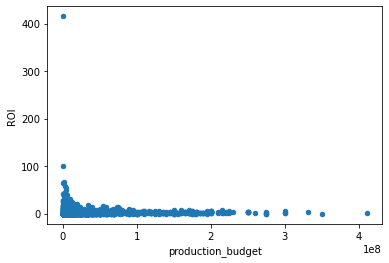

In [30]:
df_merge_final.plot.scatter('production_budget', 'ROI');

In [31]:
# Removing outlier movie 'The Gallows'
df_merge_final = df_merge_final[df_merge_final['movie'] != 'The Gallows']

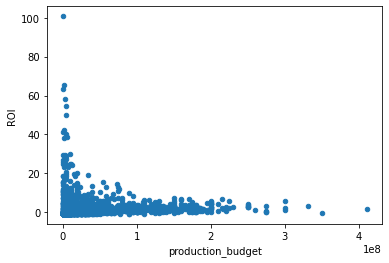

In [32]:
df_merge_final.plot.scatter('production_budget', 'ROI');

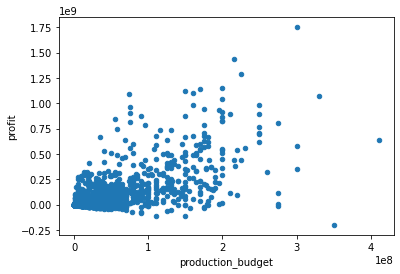

In [33]:
df_merge_final.plot.scatter('production_budget', 'profit');

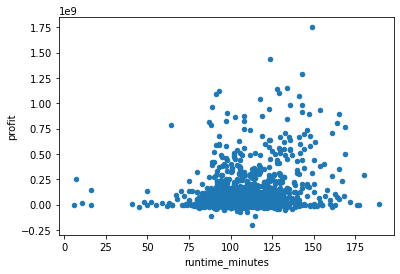

In [34]:
df_merge_final.plot.scatter('runtime_minutes', 'profit');

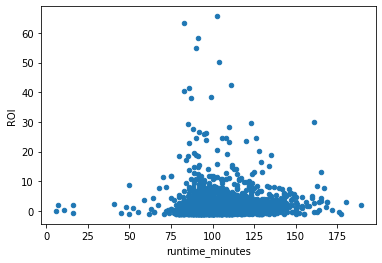

In [35]:
df_merge_final.plot.scatter('runtime_minutes', 'ROI');

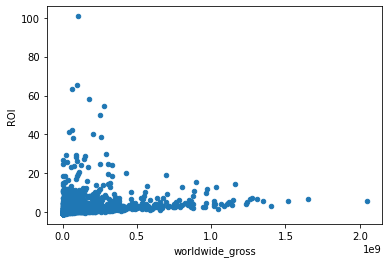

In [36]:
df_merge_final.plot.scatter('worldwide_gross', 'ROI');

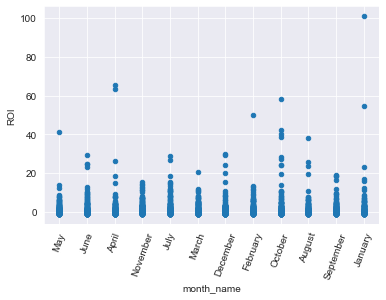

In [50]:
df_merge_final.plot.scatter('month_name', 'ROI')
plt.xticks(rotation=70);

In [51]:
# Our final dataset includes 1610 films. 
df_merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 2191
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1610 non-null   object 
 1   production_budget  1610 non-null   float64
 2   worldwide_gross    1610 non-null   float64
 3   profit             1610 non-null   float64
 4   ROI                1610 non-null   float64
 5   month              1610 non-null   int64  
 6   month_name         1610 non-null   object 
 7   director_name      1610 non-null   object 
 8   runtime_minutes    1587 non-null   float64
 9   genre              1606 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 138.4+ KB


## 6. Data Analysis
We use descriptive data analysis to find the patterns in highly profitable movies. To answer our three business questions, the following anlaysis focuses on mainly three aspects of movies, (1) Movie Genres, (2) Seasonality, and (3) Directors.  

We use ROI as the primary profitability measures in this analysis. But we also look into net profit, production budget, and worldwide gross for several analysis in below. 

### 6. 1. Genre Analysis

#### Findings:  
Average ROI is significantly higher in the Horror/Mystery genres then other genres. Howeover, this could be caused
by one specific outperforming horror/mystery movie, which might have skewed the distribution upward. So, we also check the boxplot figure for ROI. The median ROIs for horror and mistery movies are still relatively higher than that for other genres, meaning most horror and mystery movies have higher ROIs. 
Additionally, to see why ROIs for horror and mystery movies are so high, we also looked at production budget by genre. The average budget on a horror film is considerably lower than other major genres. And compared to other genres with similar budget ranges, horror films produce relatively higher global grossing. 

#### Recommendation:
For a higher ROI, the Horror/Mystery genres are good place to invest.

#### Cleaning up genres 

In [38]:
# Creating a dataframe that pulls out each genre, including films that have multiple genres.
# This will allow us to perform anaylsis based on grouping by genre
df_genre = df_merge_final.explode('genre')

df_genre_grp = df_genre.groupby(by = 'genre').mean().reset_index()

df_genre_grp.sort_values(by='ROI', ascending=False, inplace=True)

In [39]:
df_genre_grp

,genre,production_budget,worldwide_gross,profit,ROI,month,runtime_minutes
11,Horror,1.759358e+07,6.651803e+07,4.892444e+07,6.466335,6.505556,97.623596
14,Mystery,2.414520e+07,8.696404e+07,6.281885e+07,6.148324,6.585938,105.796875
18,Thriller,3.132535e+07,1.071486e+08,7.582330e+07,4.338647,6.716981,105.357414
15,Romance,2.102584e+07,6.225014e+07,4.122430e+07,2.659392,6.532710,106.589623
17,Sport,2.647500e+07,8.757090e+07,6.109590e+07,2.578671,7.843750,110.437500
16,Sci-Fi,8.938528e+07,3.212131e+08,2.318278e+08,2.576448,6.150376,114.954887
2,Animation,9.141667e+07,3.409232e+08,2.495065e+08,2.457954,7.212963,94.000000
4,Comedy,3.817925e+07,1.264128e+08,8.823350e+07,2.326252,6.778598,102.425926
12,Music,1.674944e+07,6.771147e+07,5.096202e+07,2.225392,7.018519,104.870370
3,Biography,2.415852e+07,7.189215e+07,4.773362e+07,2.127455,8.026846,115.489933


#### ROI by Genre

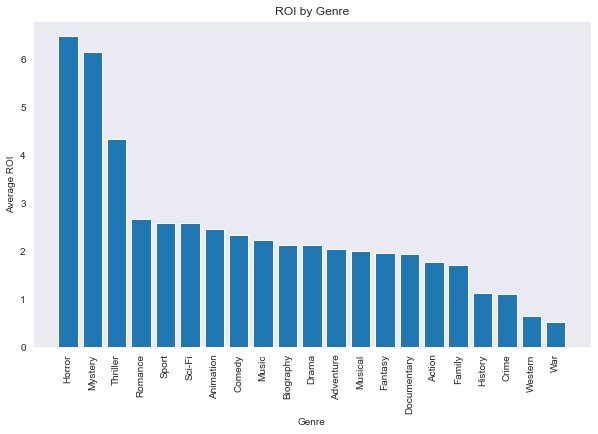

In [40]:
sns.set_style('darkgrid')

fig_dir, ax = plt.subplots(figsize=(10,6))
sns.set_style("darkgrid")

plt.bar(df_genre_grp['genre'], df_genre_grp['ROI'])
ax.grid(False)
plt.title('ROI by Genre')
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.xticks(rotation=90)
plt.savefig('Images/ROIBARGenre.png', bbox_inches = 'tight');

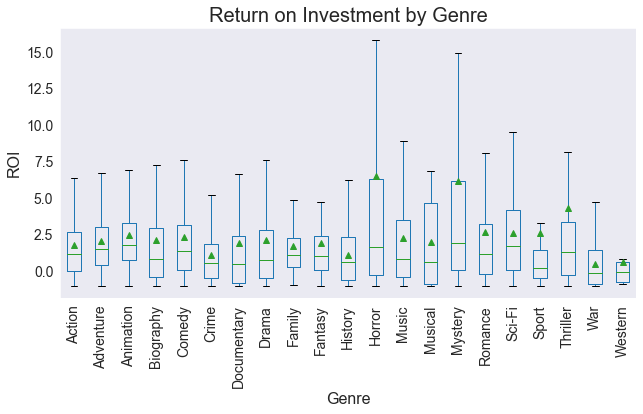

In [41]:
# Anaylsis of ROI based on movie genre, utlizing boxplot visualation
# Film data that had multiple genres are included in each genre
sns.set_style('darkgrid')

fig_box1 = df_genre.boxplot(
    column='ROI', by='genre', fontsize=14, figsize=(10,5), rot=90, 
        showfliers=False, showmeans=True, showbox=True, grid=False)


fig_box1.set_ylabel('ROI' , fontsize=16)
fig_box1.set_xlabel('Genre' , fontsize=16)
fig_box1.set_title('Return on Investment by Genre' , fontsize=20)
plt.suptitle('');

In [42]:
df_genre_grp.head()

,genre,production_budget,worldwide_gross,profit,ROI,month,runtime_minutes
11,Horror,1.759358e+07,6.651803e+07,4.892444e+07,6.466335,6.505556,97.623596
14,Mystery,2.414520e+07,8.696404e+07,6.281885e+07,6.148324,6.585938,105.796875
18,Thriller,3.132535e+07,1.071486e+08,7.582330e+07,4.338647,6.716981,105.357414
15,Romance,2.102584e+07,6.225014e+07,4.122430e+07,2.659392,6.532710,106.589623
17,Sport,2.647500e+07,8.757090e+07,6.109590e+07,2.578671,7.843750,110.437500


#### Production Budget and Worldwide Grossing by Genre 

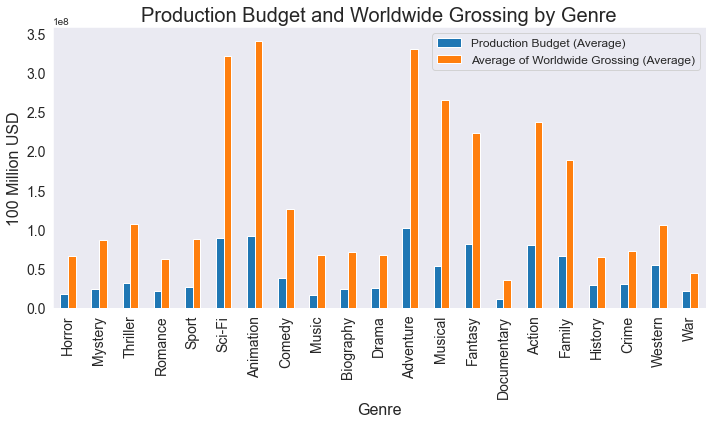

In [43]:
fig_bar3 = df_genre_grp.plot.bar(
    x='genre', y=['production_budget', 'worldwide_gross'], figsize=(10,6), fontsize=14, legend=False, grid=False)
plt.title('Production Budget and Worldwide Grossing by Genre', fontsize=20)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('100 Million USD', fontsize=16)

plt.legend(["Production Budget (Average)", "Average of Worldwide Grossing (Average)"], fontsize=12)

plt.tight_layout()

plt.savefig('Images/Bar_budget_gross_genre1.png', bbox_inches='tight');

### 6. 2. Seasonality Analysis

#### Findings:  
Movies released in January, July, and October hold higher average ROIs than in other months.
#### Recommendation:
January, July, and October are the three best months to release a new movie. This roughly corresponse with holiday seasons.  


#### ROI by Month

In [44]:
df_month = df_merge_final.groupby(by='month_name').mean().reset_index()
df_month.sort_values(by='month', inplace=True)
df_month.head()

,month_name,production_budget,worldwide_gross,profit,ROI,month,runtime_minutes
4,January,2.973198e+07,7.813003e+07,4.839805e+07,3.564756,1,105.104762
3,February,4.089670e+07,1.232870e+08,8.239030e+07,2.554638,2,104.592593
7,March,4.859301e+07,1.367999e+08,8.820690e+07,1.840264,3,104.137931
0,April,2.893239e+07,9.735049e+07,6.841810e+07,2.484015,4,104.481752
8,May,6.803720e+07,2.067059e+08,1.386687e+08,2.175671,5,107.705357


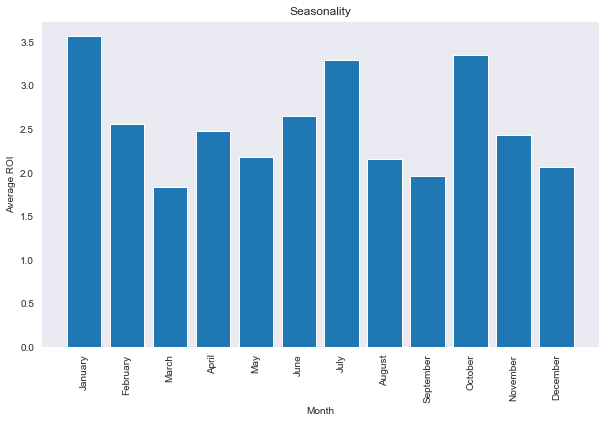

In [45]:
fig_month, ax = plt.subplots(figsize=(10, 6))

plt.bar(df_month['month_name'], df_month['ROI'])
ax.grid(False)
plt.title('Seasonality')
plt.xlabel('Month')
plt.ylabel('Average ROI')
plt.xticks(rotation=90)
plt.savefig('Images/seasonality_final.png', bbox_inches='tight');

### 6. 3. Director Analysis

#### Findings:  
We find the top 20 directors in the horror genre based on average return on investment. 
#### Recommendation:
We would recommend in a new movie studio venturing in the horror genre to attempt to acquire one of these top 20 directors. This would have the best potential on return on your investment

#### Cleaning up directors

In [46]:
# Creating a new dataframe that pulls out director names and genres (including multiple directors, and multiple genres)
df_directors = df_merge_final.explode('director_name').explode('genre')

# Filter new dataframe to only show horror movie directors
# Then groupby director and sum the other columns (to provide total profit)
df_directors = df_directors[df_directors['genre'] == 'Horror'].groupby(by='director_name').mean().reset_index()

# Sort values by total profit per director
df_directors.sort_values(by = 'ROI', inplace=True, ascending = False)

# Creating new dataframe to show only the top 20 horror movie directors based on total profit
df_directors_top = df_directors.head(20)
df_directors_top

,director_name,production_budget,worldwide_gross,profit,ROI,month,runtime_minutes
72,Joaquin Perea,1.000000e+06,1.017595e+08,100759490.0,100.759490,1.000000,NaN
95,Levan Gabriadze,1.000000e+06,6.436420e+07,63364198.0,63.364198,4.000000,83.000000
156,Tod Williams,3.000000e+06,1.775120e+08,174512032.0,58.170677,10.000000,91.000000
84,Jordan Peele,5.000000e+06,2.553680e+08,250367951.0,50.073590,2.000000,104.000000
16,Bradley Parker,1.000000e+06,4.241172e+07,41411721.0,41.411721,5.000000,86.000000
63,James Wan,1.075000e+07,2.089355e+08,198185513.5,40.240299,5.500000,107.500000
11,Ariel Schulman,5.000000e+06,1.749289e+08,169928918.0,33.985784,10.000000,85.500000
59,Henry Joost,5.000000e+06,1.749289e+08,169928918.0,33.985784,10.000000,85.500000
130,Robert Heath,3.500000e+06,9.512734e+07,91627344.0,26.179241,4.000000,96.000000
33,David Gordon Green,1.000000e+07,2.549007e+08,244900667.0,24.490067,10.000000,106.000000


#### Top 20 Directors in the Horror Genre Based on ROI

''

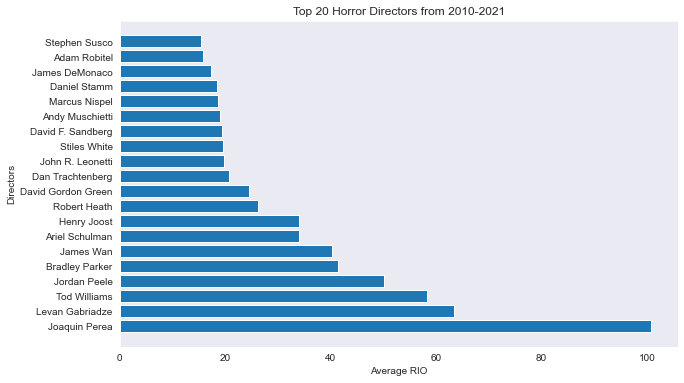

In [58]:
# Visualation of the top 20 horror movie directors from 2010-2021
fig_dir, ax = plt.subplots(figsize=(10,6))
sns.set_style("dark")

plt.barh(df_directors_top['director_name'], df_directors_top['ROI'], )
plt.title('Top 20 Horror Directors from 2010-2021')
plt.xlabel('Average RIO')
plt.ylabel('Directors')
plt.savefig('Images/directors_final.png', bbox_inches = 'tight')
;

#### Top 20 Directors in the Horror Genre Based on Worldwide Gross

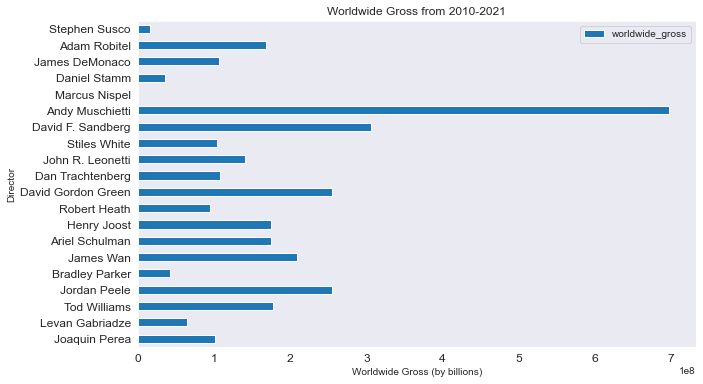

In [54]:
df_directors_top.plot.barh(x='director_name', y='worldwide_gross', 
                           figsize=(10,6), fontsize=12,  grid=False)
plt.title('Worldwide Gross from 2010-2021')
plt.xlabel('Worldwide Gross (by billions)')
plt.ylabel('Director');

## 7. Conclusions and Next Steps

Our analysis on ROI suggests that for a higher return, (1) make a horror/mistery film, (2) release in January, July, or October, (3) and seek the top director on the list.  
We find that horror/mistery movies are often made on a low budget, yet the gross is relatively high. Release data should be adjusted for people’s vacation seasons. Lastly, a list of top 20 directors in the horror genre shows the names, which guarantee higher profit. 
 

One caveat of our ROI analysis is that a high return on investment is not always equal to how much cash in hand. 
For the size of the profit, movies with large production budgets often hit the recode high grossing. 
Microsoft is not a small corporation with limited production budgets, and their interest could be more in having a larger net profit. 
Thus, for the next step, we will include the size of net profit as our second indicator. 
Additionally, revenue from streaming original movies in their own contents is important income from making original movies. 
So, for the future analysis, we will expand our analysis in that direction.